In [9]:
!python --version
import numpy as np; print('Numpy ', np.__version__)
import scipy; print('Scipy ', scipy.__version__)
import matplotlib; print('Matplotlib ', matplotlib.__version__)
import sklearn; print('Scikit-Learn ',sklearn.__version__)


Python 3.9.13
Numpy  1.23.5
Scipy  1.9.3
Matplotlib  3.5.2
Scikit-Learn  1.0.2


In [20]:
# np.random.normal(평균, 표준편차, 개수)

a = np.random.normal(0, 1, 1000)
b = np.random.normal(0, 0.9, 1000)
c = np.random.normal(0.1, 1, 1000)
d = np.random.normal(0.1, 1, 900)

In [21]:
from scipy.stats import ttest_ind
print('ttest_ind(a,b) =', ttest_ind(a,b))
print('ttest_ind(a,c) =', ttest_ind(a,c))
print('ttest_ind(a,d) =', ttest_ind(a,d)) # 사이즈가 달라도 ttest_ind 사용 가능

ttest_ind(a,b) = Ttest_indResult(statistic=-0.47035688101757434, pvalue=0.6381514029752735)
ttest_ind(a,c) = Ttest_indResult(statistic=-2.5378799990313765, pvalue=0.011228017473066005)
ttest_ind(a,d) = Ttest_indResult(statistic=-1.8738661612158534, pvalue=0.0611024049759985)


<function matplotlib.pyplot.show(close=None, block=None)>

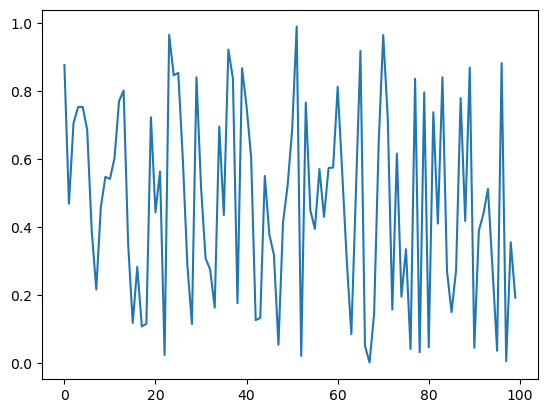

In [22]:
import matplotlib.pyplot as plt

x = np.random.random(100)
plt.plot(x)
plt.show

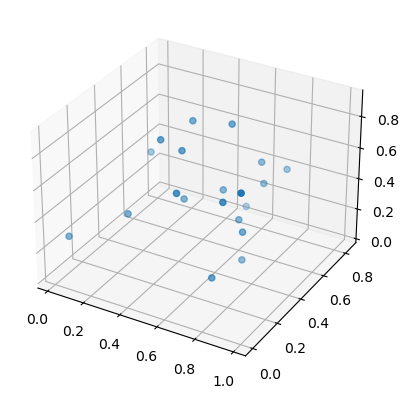

In [24]:
from mpl_toolkits.mplot3d import Axes3D
x = np.random.random(20)
y = np.random.random(20)
z = np.random.random(20)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)
plt.show() # 터미널 환경에서 실행하면 이리저리 시점을 회전 시켜가며 볼 수 있다.

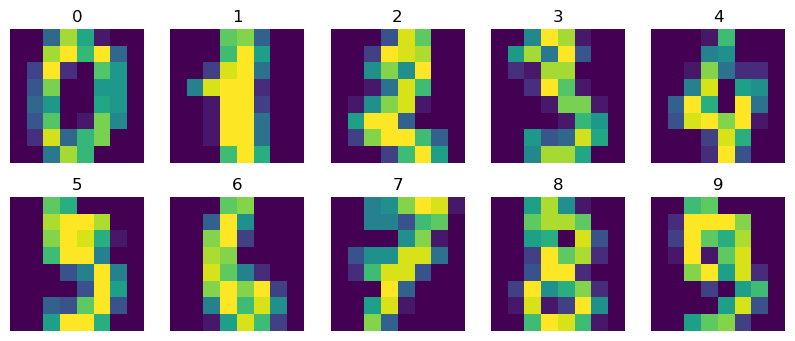

In [40]:
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier

d = load_digits()
digits = d["data"]
labels = d['target']

# 데이터 확인
img = digits[:10].reshape(10, 8,8)
title = labels[:10]
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.title(title[i])
    plt.axis('off')
    plt.imshow(img[i])
plt.show()

In [46]:
N = 200
idx = np.argsort(np.random.random(len(labels)))

print('idx = ', idx, "number of data =", len(idx))
print('digits[idx[:N]] = ', digits[idx[:N]])
print('labels[idx[:N]] = ', labels[idx[:N]])

x_test, y_test = digits[idx[:N]], labels[idx[:N]]
x_train, y_train = digits[idx[N:]], labels[idx[N:]]


idx =  [ 598  796  905 ... 1720  872 1403] number of data = 1797
digits[idx[:N]] =  [[ 0.  0.  0. ... 12.  0.  0.]
 [ 0.  0.  2. ...  1.  0.  0.]
 [ 0.  0.  2. ...  7.  0.  0.]
 ...
 [ 0.  0. 15. ...  7.  0.  0.]
 [ 0.  0.  3. ...  0.  0.  0.]
 [ 0.  0.  7. ...  7.  0.  0.]]
labels[idx[:N]] =  [6 0 8 3 6 4 5 3 1 7 7 3 1 8 1 8 1 1 7 6 1 8 0 3 2 5 5 2 7 4 4 8 6 5 2 2 7
 3 0 2 5 3 4 4 7 6 4 3 5 5 7 3 0 0 9 9 8 2 6 7 3 5 1 1 7 7 0 3 7 3 0 3 2 0
 4 2 4 2 0 0 8 2 0 8 5 0 9 0 1 4 5 3 6 3 7 9 0 1 2 7 7 3 6 6 4 9 3 6 8 1 8
 0 4 1 5 5 2 4 1 7 9 9 5 8 0 1 4 7 2 8 2 9 1 1 6 4 3 4 6 1 2 0 9 6 5 0 9 8
 8 9 0 1 2 4 3 3 0 5 9 6 7 4 5 3 9 8 9 6 9 9 3 0 9 6 3 5 2 5 6 4 7 5 5 1 6
 1 2 7 7 3 7 2 9 0 4 1 4 8 7 3]


In [47]:
clf = MLPClassifier(hidden_layer_sizes=(128,))
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
pred = clf.predict(x_test)
err = np.where(y_test != pred)[0]
print('score :', score)
print('errors :')
print('actual :', y_test[err])
print('predicted :', pred[err])

score : 0.955
errors :
actual : [8 8 5 8 4 5 9 0 3]
predicted : [1 1 6 1 9 3 7 2 9]


In [52]:
pred

array([6, 0, 1, 3, 6, 4, 5, 3, 1, 7, 7, 3, 1, 8, 1, 8, 1, 1, 7, 6, 1, 1,
       0, 3, 2, 5, 6, 2, 7, 4, 4, 1, 6, 5, 2, 2, 7, 3, 0, 2, 5, 3, 4, 4,
       7, 6, 9, 3, 5, 5, 7, 3, 0, 0, 9, 9, 8, 2, 6, 7, 3, 3, 1, 1, 7, 7,
       0, 3, 7, 3, 0, 3, 2, 0, 4, 2, 4, 2, 0, 0, 8, 2, 0, 8, 5, 0, 9, 0,
       1, 4, 5, 3, 6, 3, 7, 9, 0, 1, 2, 7, 7, 3, 6, 6, 4, 9, 3, 6, 8, 1,
       8, 0, 4, 1, 5, 5, 2, 4, 1, 7, 9, 9, 5, 8, 0, 1, 4, 7, 2, 8, 2, 7,
       1, 1, 6, 4, 3, 4, 6, 1, 2, 0, 9, 6, 5, 0, 9, 8, 8, 9, 0, 1, 2, 4,
       3, 3, 2, 5, 9, 6, 7, 4, 5, 3, 9, 8, 9, 6, 9, 9, 3, 0, 9, 6, 9, 5,
       2, 5, 6, 4, 7, 5, 5, 1, 6, 1, 2, 7, 7, 3, 7, 2, 9, 0, 4, 1, 4, 8,
       7, 3])